# Primeiro trabalho de processamento de imagens 2021.1











In [ ]:
import cv2 # biblioteca de processamento de imagens
import numpy as np # funções numéricas
import matplotlib.pyplot as plt # visualização
from PIL import Image 
import requests

# Montando o google drive, onde as imagens usadas foram colocadas (mesma pasta do notebook)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 - Abra duas imagens coloridas de formatos (extensão) diferentes, p.e., jpg e png.

Primeiro criei uma função para fazer o download a depois transformei elas em numpy arrays para usar o OpenCV nas questões seguintes, já que o formato do PIL não é aceito no OpenCV.

In [ ]:
def url_to_image(url):
  """
  Faz o download da imagem, converte em np.array e abre usando o OpenCV
  """
  resp = requests.get(url, stream=True)
  image = Image.open(resp.raw)

  return image

# lendo as imagens
pil_water = url_to_image("https://portxl.org/wp-content/uploads/2020/09/water.jpeg") #imagem jpeg

pil_lenna = url_to_image("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png") #imagem png

water = np.array(pil_water)
lenna = np.array(pil_lenna)

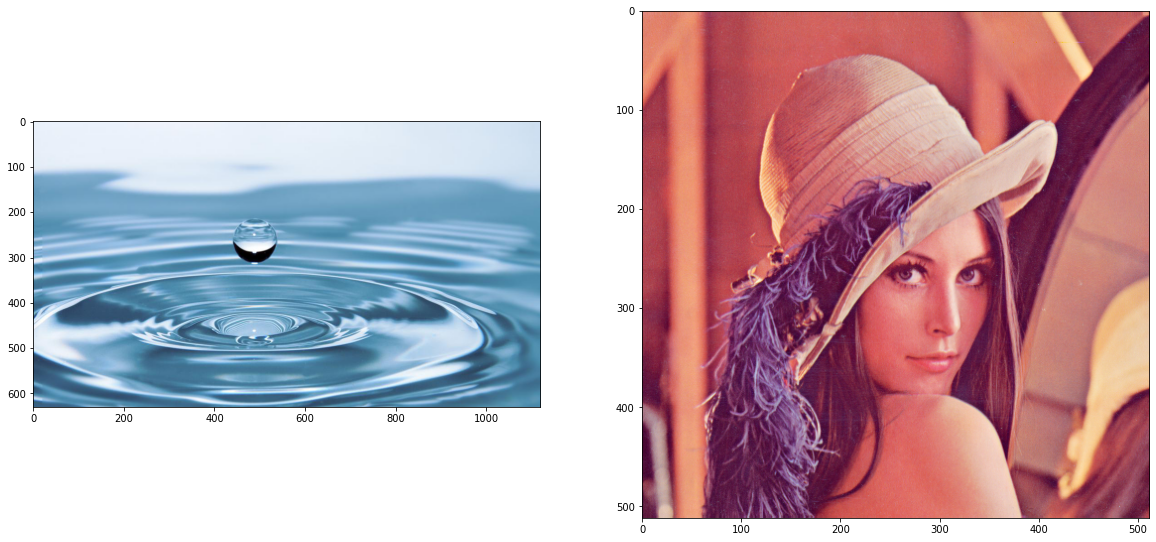

In [ ]:
# Visualização das imagens
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.imshow(water)
plt.subplot(1,2,2)
plt.imshow(lenna);

## 2 - Transforme as imagens da questão anterior em nível de cinza, com uso de alguma função nativa, pelo uso de um canal (R ou G ou B) e pela média dos canais.

### Pela função nativa:

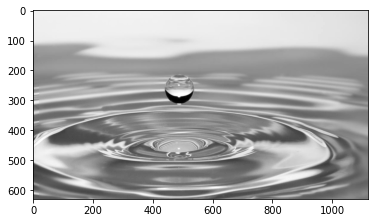

In [ ]:
def gray_conversion(rgb_img):
  """
  Converte uma imagem rgb em escala de cinza
  """
  gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY) #converte em escala de cinza
  plt.imshow(gray_img, cmap = "gray")
  return gray_img

gray_water = gray_conversion(rgb_img = water)

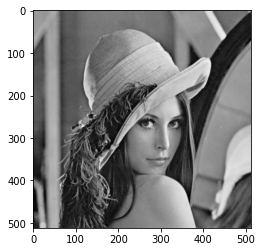

In [ ]:
gray_lenna = gray_conversion(rgb_img = lenna)

### Pelo uso de um canal:

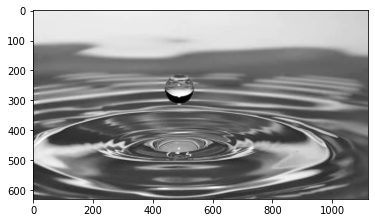

In [ ]:
gray_channel_water = water[:,:,0].copy() # pega apenas o canal R
plt.imshow(gray_channel_water, cmap = "gray")

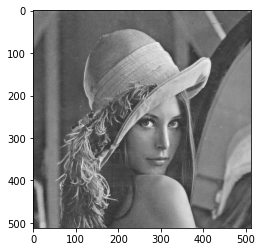

In [ ]:
gray_channel_lenna = lenna[:,:,2].copy() # pega apenas o canal B
plt.imshow(gray_channel_lenna, cmap = "gray")

### Pela média dos canais

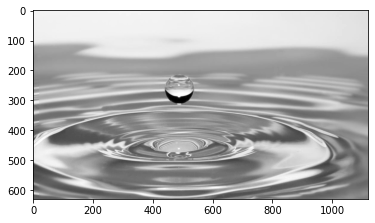

In [ ]:
gray_mean_water = np.mean(water, axis = 2)
plt.imshow(gray_mean_water, cmap = "gray") # tira a média sobre os valores de todos os canais

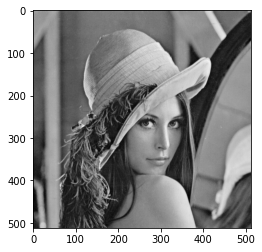

In [ ]:
gray_mean_lenna = np.mean(lenna, axis = 2)
plt.imshow(gray_mean_lenna, cmap = "gray") # tira a média sobre os valores de todos os canais

## 3 - Realize a composição de duas imagens com regiões de frente em localizações excludentes.

Como o exercício pede pra usar regiões de frente excludentes, eu escolhi outras duas imagens para fazer esse exercício de composição, para que a imagem de um (cachorro) não ficasse sobreposta à do outro (gato).

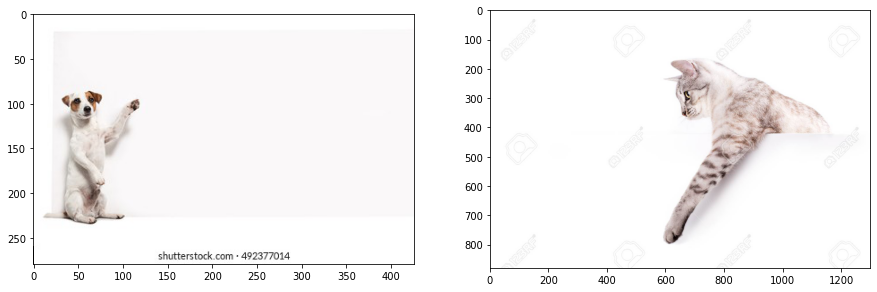

In [ ]:
dog = np.array(url_to_image("https://image.shutterstock.com/image-photo/dog-banner-pet-showing-placard-260nw-492377014.jpg"))
cat = np.array(url_to_image("https://previews.123rf.com/images/dimakp/dimakp1501/dimakp150100532/35520924-cat-blank-poster-isolated-on-white-background.jpg"))


# mostrando as figuras usadas para esse exercício
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
plt.imshow(dog)

plt.subplot(1,2,2)
plt.imshow(cat);

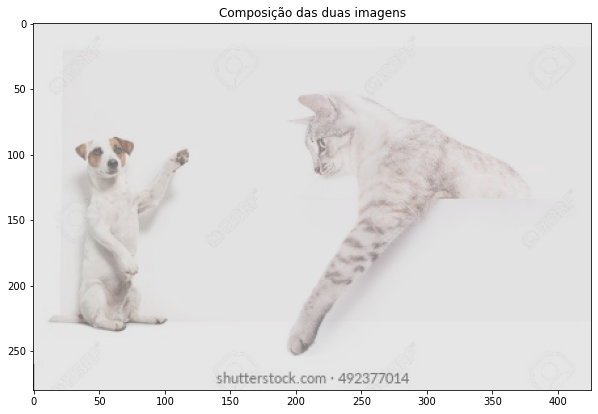

In [ ]:
# configurando alpha e beta para a opacidade desejada de cada imagem
alpha = 0.5
beta = 0.4

# escalando uma das imagens para poder fazer a operação de composição (as duas precisam estar do mesmo tamanho)
cat = cv2.resize(other_dog, (dog.shape[1], dog.shape[0]))

# composição das duas imagens
composition = cv2.addWeighted(dog, alpha, cat, beta, 0.0)
plt.figure(figsize = (10,7))
plt.imshow(composition)
plt.title("Composição das duas imagens");

## 4 - Faça a operação de subtração da imagem (Fig0227(a)(washington_infrared).tif) com a mesma imagem obtida ao zerar os 3 bits menos significativos.

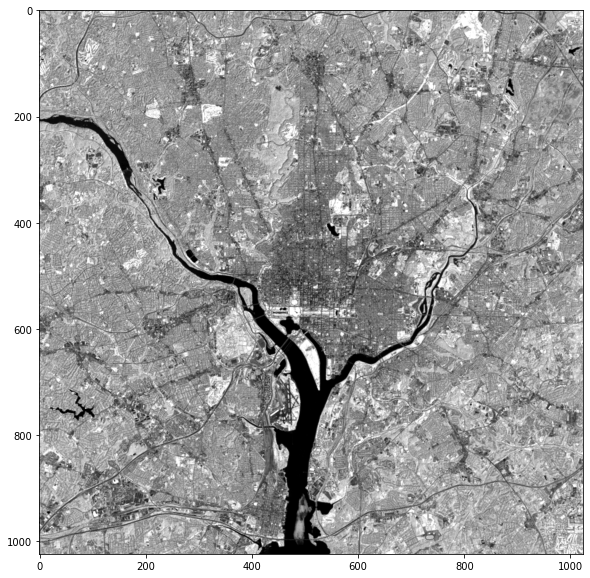

In [ ]:
washington = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Fig0227(a)(washington_infrared).tif"))
plt.figure(figsize = (10,10))
plt.imshow(washington, cmap = "gray");

Zerando os 3 bits menos significativos:

In [ ]:
# inicializa a matriz que será usada para a nova iamgem
three_bit_washington = np.zeros(shape = (washington.shape[0], washington.shape[1]))

# para cada linha e coluna da imagem original
for i, row in enumerate(washington):
  for j, col in enumerate(row):

    # remove os três últimos bits e substitui por zeros
    # new_binary fica no formato "0b100110"
    new_binary = bin(washington[i][j])[:-3] + "000"
    
    # converte em int novamente. [2:] para remover 0b da string
    three_bit_washington[i][j] = int(new_binary[2:],2)

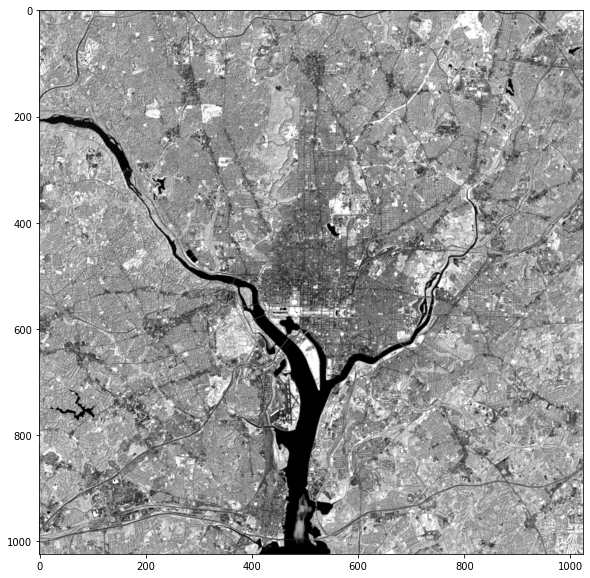

In [ ]:
# visualização da nova imagem com os 3 bits menos significativos alterados
plt.figure(figsize = (10,10))
plt.imshow(three_bit_washington, cmap = "gray");

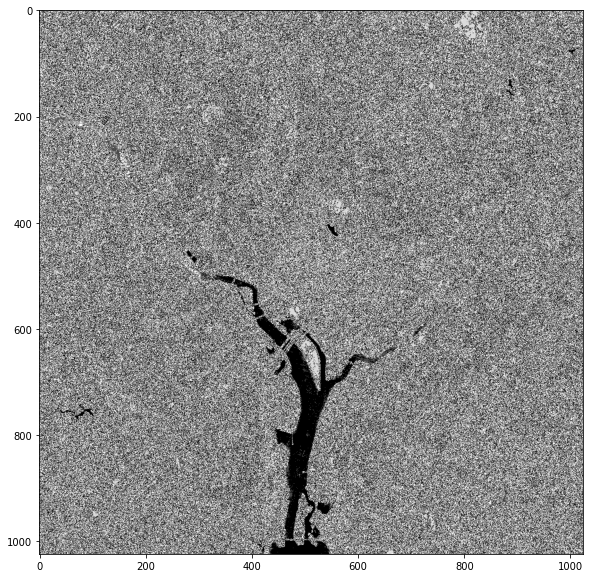

In [ ]:
# calcula a subtração e plota a imagem final
subtraction = cv2.subtract(washington, np.uint8(three_bit_washington))
plt.figure(figsize = (10,10))
plt.imshow(subtraction, cmap = "gray");

A imagem final é basicamente composta de ruído, porém boa parte do rio que aparece fica nítido.

## 5 - Faça a operação de subtração das imagens (Fig0228(a)) e (Fig0228(b)).

In [ ]:
# carregando as imagens do drive
angiograph_mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Fig0228(a)(angiography_mask_image).tif"))
angiograph_live = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Fig0228(b)(angiography_live_ image).tif"))

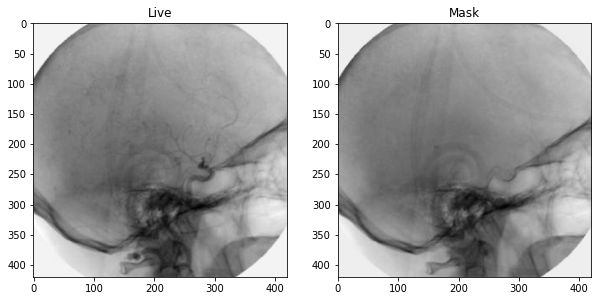

In [ ]:
# mostrando as duas imagens lado a lado
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(angiograph_live, cmap = "gray")
plt.title("Live")

plt.subplot(1,2,2)
plt.imshow(angiograph_mask, cmap = "gray")
plt.title("Mask");

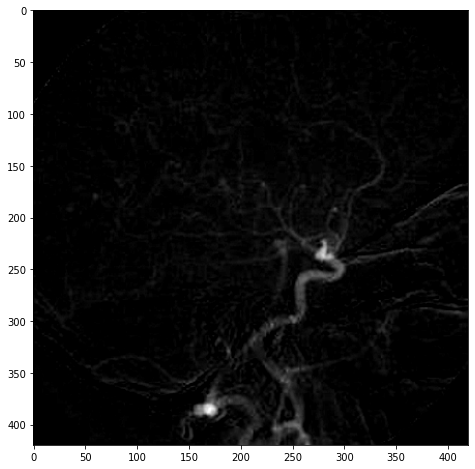

In [ ]:
# diferença entre as imagens
diff = cv2.subtract(angiograph_mask, angiograph_live)

plt.figure(figsize = (8,8))
plt.imshow(diff, cmap = "gray");

## 6 - Adicione um ruído gaussiano de média zero e desvio qualquer à imagem (Fig0226(galaxy_pair_original).tif) e em seguida, faça o processo de restauração com 10, 50 e 100 imagens ruidosas.

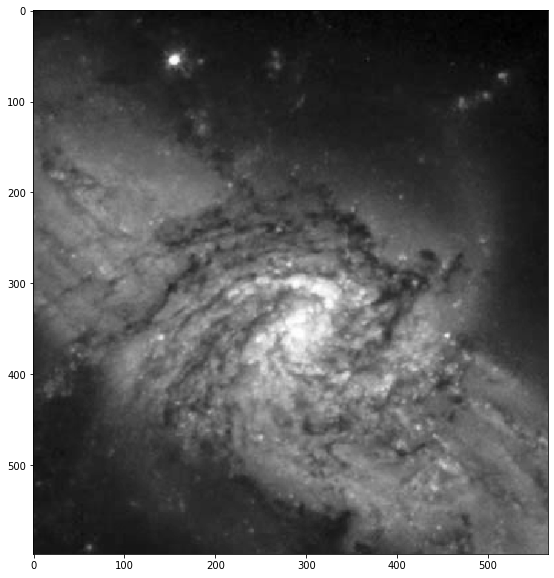

In [ ]:
# lendo a imagem
galaxy = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Fig0226(galaxy_pair_original).tif"))
plt.figure(figsize = (10,10))
plt.imshow(galaxy, cmap = "gray");

### Adição de ruído

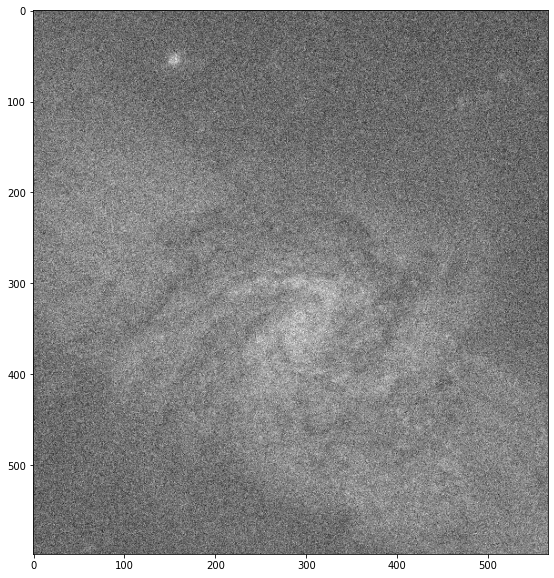

In [ ]:
def add_noise(original_image, noise_mean = 0, noise_variance = 64):
  # cria a matriz de ruído
  noise = np.random.normal(noise_mean, noise_variance, (original_image.shape[0],original_image.shape[1]))
  # adiciona o ruído à imagem original
  noisy_image = cv2.add(np.float64(original_image),noise)

  return noisy_image, noise

noisy_galaxy, noise = add_noise(galaxy)
# mostra a imagem
plt.figure(figsize = (10,10))
plt.imshow(noisy_galaxy, cmap = "gray");

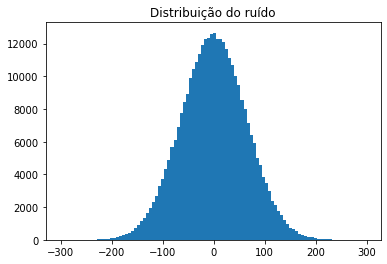

In [ ]:
# Confirmando a distribuição gaussiana do ruído
plt.hist(noise.flatten(), bins = 100)
plt.title("Distribuição do ruído");

### Restauração

100%|██████████| 10/10 [00:00<00:00, 51.17it/s]


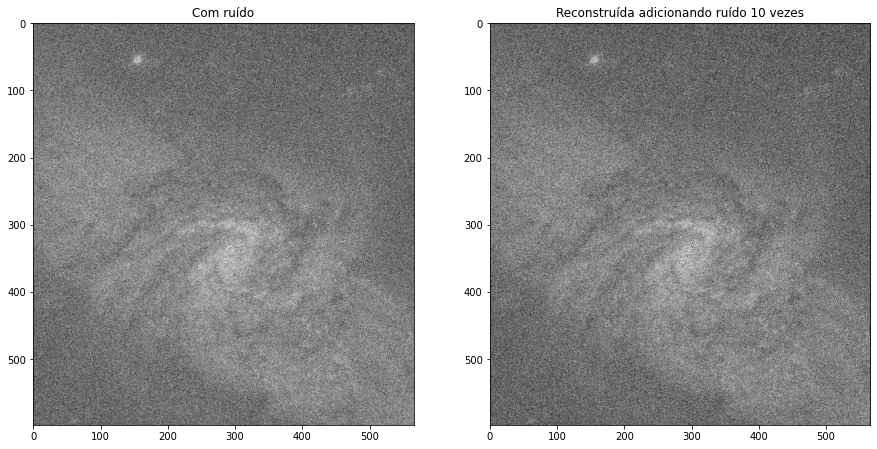

In [ ]:
from tqdm import tqdm # barra de progresso

def reconstruct(noisy_image, times_noise = 10):
  i = 0
  # imagem reconstruida 10 vezes
  recon = noisy_image.copy()

  # adiciona o mesmo ruído gaussiano na imagem ruidosa por times_noise vezes
  for i in tqdm(range(times_noise)):
    recon = recon + add_noise(noisy_image)[0]
    i += 1
    
  # normaliza a imagem reconstruída para ficar com os pixels no intervalo [0,255]
  recon_normalized =  cv2.normalize(recon/times_noise, dst = None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX) 

  # plota as imagens original com ruído e a reconstruída
  plt.figure(figsize = (15,15))
  plt.subplot(1,2,1)
  plt.imshow(noisy_image, cmap = "gray")
  plt.title("Com ruído")
  plt.subplot(1,2,2)
  plt.imshow(recon_normalized, cmap = "gray")
  plt.title("Reconstruída adicionando ruído {} vezes".format(times_noise))
  
  return np.uint8(recon_normalized)


recon10_galaxy = reconstruct(noisy_galaxy, times_noise = 10)


100%|██████████| 50/50 [00:00<00:00, 51.34it/s]


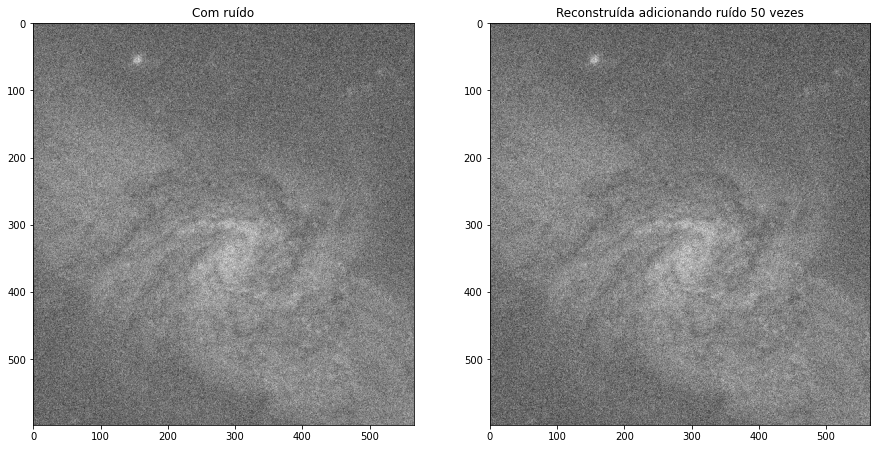

In [ ]:
recon50_galaxy = reconstruct(noisy_galaxy, times_noise = 50)

100%|██████████| 100/100 [00:01<00:00, 54.46it/s]


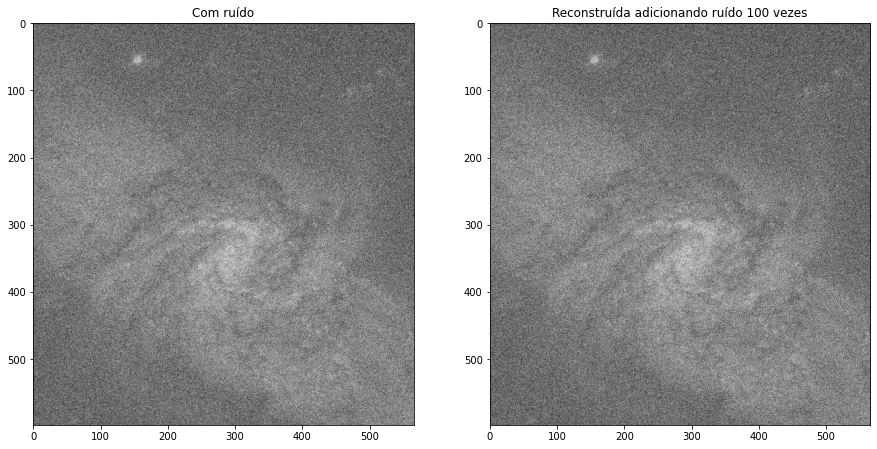

In [ ]:
recon100_galaxy = reconstruct(noisy_galaxy, times_noise = 100)

## 7 - Use o produto para selecionar ROI’s de (Fig0230(a)(dental_xray).tif).

In [ ]:
## abrindo as imagens
xray = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Fig0230(a)(dental_xray).tif"))
mask_xray = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Fig0230(b)(dental_xray_mask).tif"))

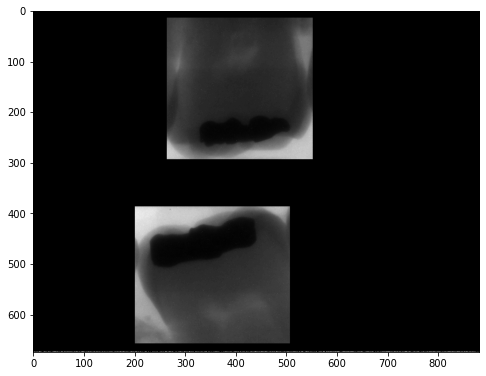

In [ ]:
# multiplicando as imagens e mostrando a ROI em destaque
roi = xray * mask_xray
plt.figure(figsize = (8,8))
plt.imshow(roi, cmap = "gray");

## 8 - Faça a criação de um overlay circular ou retangular sobre uma ROI de uma imagem.

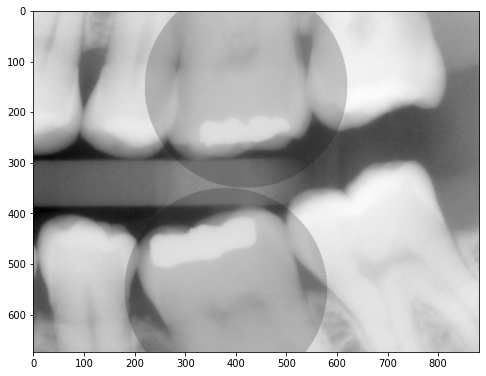

In [ ]:
# usando a imagem anterior
overlay = xray.copy()

# definindo alpha e beta para ajustar a opacidade dos círculos
alpha = 0.2
beta = 1 - alpha

# desenha os círculos nas ROI
cv2.circle(overlay, center = (420,150), radius = 200, color = 2, thickness = cv2.FILLED)
cv2.circle(overlay, center = (380,550), radius = 200, color = 2, thickness = cv2.FILLED)
overlayed_img = cv2.addWeighted(src1 = overlay, alpha = alpha, src2 = xray, beta = beta, gamma = 0)

# mostra a figura
plt.figure(figsize = (8,8))
plt.imshow(overlayed_img, cmap = "gray");

## 9 - Realize a união e interseção da imagem (Fig0232(a)(partial_body_scan).tif) com uma imagem constante igual a 3 vezes a média da primeira.

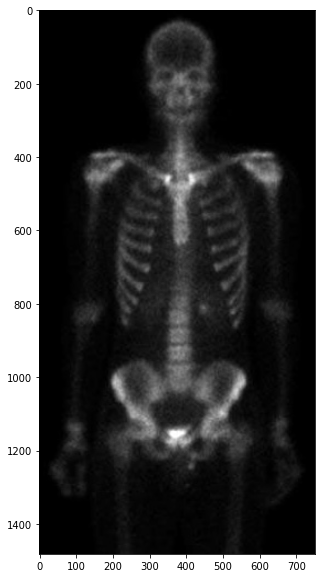

In [ ]:
bscan = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Fig0232(a)(partial_body_scan).tif"))

# visualizando a imagem
plt.figure(figsize = (20,10))
plt.imshow(bscan, cmap = "gray");

Text(0.5, 1.0, 'União')

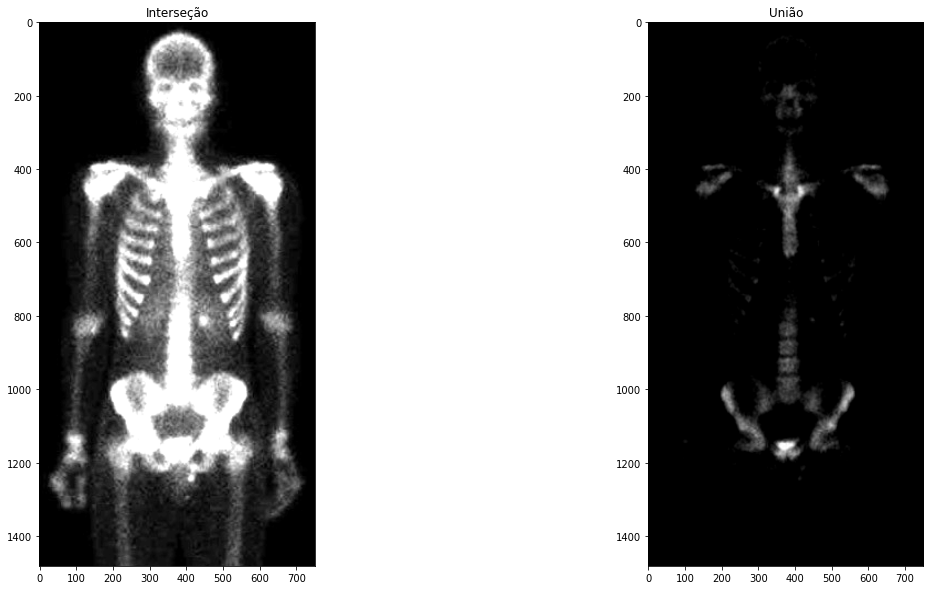

In [ ]:
# criando a matriz constante
const_matrix = np.full(shape = (bscan.shape[0], bscan.shape[1]), fill_value = 3*bscan.mean())

# interseção entre duas imagens é dada pelo valor mínimo entre cada par de pixel correspondente (Processamento Digital de Imagens, Gonzalez, 3ed, pag 53)
intersection = np.minimum(bscan, const_matrix)

# união de duas imagens é dada pelo valor máximo entre cada par de pixel correspondente (Gonzalez, 3ed, pag 53)
union = np.maximum(bscan, const_matrix)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.imshow(intersection, cmap = "gray")
plt.title("Interseção")

plt.subplot(1,2,2)
plt.imshow(union, cmap = "gray")
plt.title("União")

## 10 - Faça uso das operações AND e NOT

Aqui eu usei a mesma imagem anterior, junto com a matriz constante, para comparar o resultado com os outros obtidos de interseção e união. 

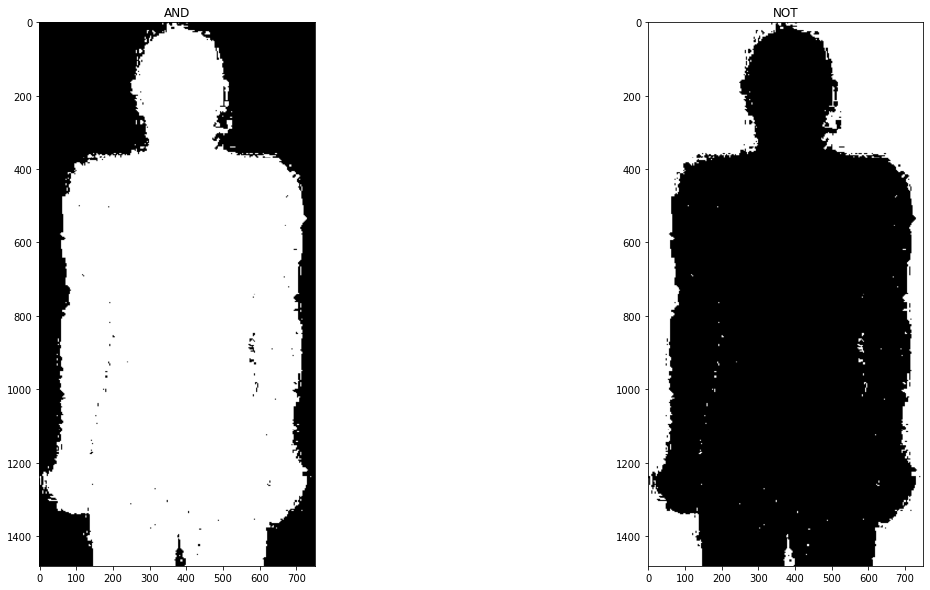

In [ ]:
# operação and
intersection = np.logical_and(bscan, const_matrix)

# operação not
not_img = np.logical_not(bscan, const_matrix)

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.imshow(intersection, cmap = "gray")
plt.title("AND");

plt.subplot(1,2,2)
plt.imshow(not_img, cmap = "gray")
plt.title("NOT");

## 11 - Realize a escala e rotação sem interpolação, depois com a interpolação bilinear em uma imagem.



### Escala

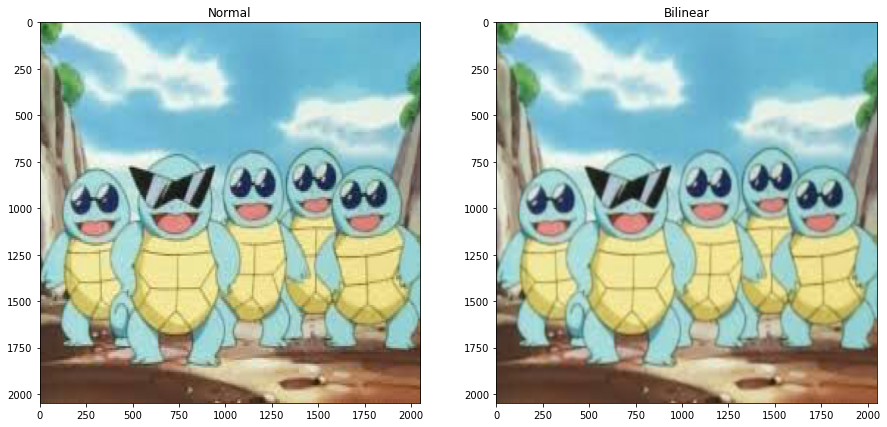

In [ ]:
# resolução original: 259x194. Usei uma imagem de baixa resolução para ficar mais fácil de ver o efeito de diferentes interpolações
squirtle = url_to_image("http://pm1.narvii.com/6289/de042acafe6fae9d23a66a149b2d1012c1ee1506_00.jpg") 
squirtle = np.array(squirtle)

size = 2048
squirtle_scale_normal = cv2.resize(squirtle, (size, size), interpolation = cv2.INTER_NEAREST) # vizinho mais próximo
squirtle_scale_bilinear = cv2.resize(squirtle, (size, size), interpolation = cv2.INTER_LINEAR) # bilinear

plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(squirtle_scale_normal, cmap = "gray")
plt.title("Normal")

plt.subplot(1,2,2)
plt.imshow(squirtle_scale_bilinear, cmap = "gray")
plt.title("Bilinear");

### Rotação

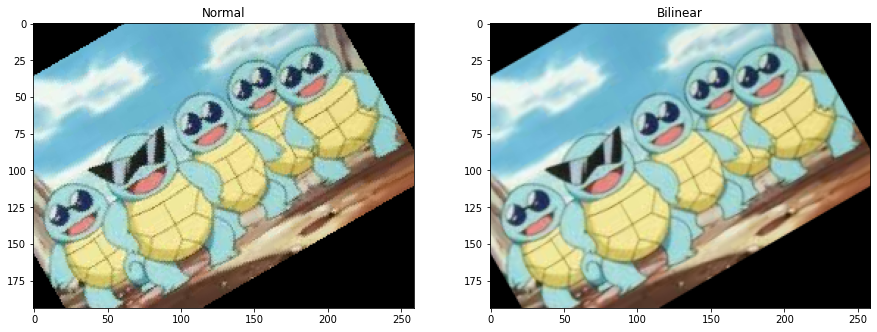

In [ ]:
# centro de rotação e ângulo 
image_center = (squirtle.shape[0]/2,squirtle.shape[1]/2)
angle = 30

# cria a matriz de rotação
rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)

# aplica a matriz na imagem, com diferentes métodos de interpolação
rotated_img_nearest = cv2.warpAffine(squirtle, rot_mat, squirtle.shape[1::-1], flags=cv2.INTER_NEAREST) #vizinho mais próximo
rotated_img_bilinear = cv2.warpAffine(squirtle, rot_mat, squirtle.shape[1::-1], flags=cv2.INTER_LINEAR) # bilinear

# mostrando as imagens rotacionadas
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(rotated_img_nearest, cmap = "gray")
plt.title("Normal")

plt.subplot(1,2,2)
plt.imshow(rotated_img_bilinear, cmap = "gray")
plt.title("Bilinear");

Na rotação fica mais claro que a rotação com a interpolação de vizinhos mais próximos fica um pouco deteriorada, enquanto que com a interpolação bilinear os traços ficam mais "suaves". 